In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.drop(columns='RowNumber', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   HasCrCard           10000 non-null  int64  
 10  IsActiveMember      10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  int64  
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Point

In [6]:
df.shape

(10000, 17)

In [7]:
round(df.describe(), 2)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0,10000.0,10000.00,10000.00
mean,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2,0.2,3.01,606.52
std,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4,0.4,1.41,225.92
min,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0,0.0,1.00,119.00
25%,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0,0.0,2.00,410.00
50%,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0,0.0,3.00,605.00
75%,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0,0.0,4.00,801.00
max,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0,1.0,5.00,1000.00


In [8]:
df.isnull().sum()

CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

<Axes: ylabel='CreditScore'>

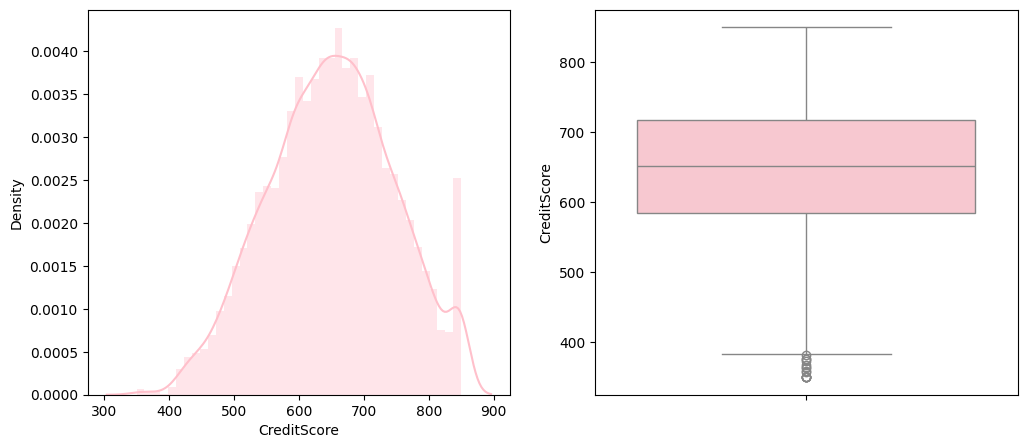

In [9]:
# LETS CHECK TH DISTRIBUTION OF CREDIT SCORE
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.distplot(df['CreditScore'], kde=True, ax=ax[0], color='pink')
sns.boxplot(df['CreditScore'], ax=ax[1], color='pink')

In [10]:
skewness_creditscore = df['CreditScore'].skew()
kurtosis_creditsscore = df['CreditScore'].kurtosis()

print(f'The skew is: {round(skewness_creditscore, 2)}')
print(f'The kurtosis is: {round(kurtosis_creditsscore, 2)}')

The skew is: -0.07
The kurtosis is: -0.43


# **OBSERVATION**
1. Skewness: With a skewness of -0.07, the distribution of the "CreditScore" column is slightly skewed to the left, but the skewness is close to zero, indicating that the distribution is approximately symmetric.

2. Kurtosis: With a kurtosis of -0.43, the distribution of the "CreditScore" column has slightly lighter tails and is slightly less peaked compared to a normal distribution.

In [11]:
df[df['CreditScore'] < 400]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
942,15804586,Lin,376,France,Female,46,6,0.00,1,1,0,157333.69,1,1,2,PLATINUM,979
1193,15779947,Thomas,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1,1,2,SILVER,324
1201,15651052,McMasters,399,Germany,Male,46,2,127655.22,1,1,0,139994.68,1,1,5,PLATINUM,475
1405,15612494,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1,1,1,PLATINUM,981
1631,15685372,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1,1,3,SILVER,643
1838,15758813,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1,1,2,GOLD,261
1962,15692416,Aikenhead,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1,1,4,SILVER,976
2473,15679249,Chou,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1,1,4,SILVER,453
2579,15597896,Ozoemena,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1,1,4,DIAMOND,342


In [12]:
df[(df['CreditScore'] < 400) & (df['Exited'] == 0)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned


# **OBSERVATION**
1. The outliers that fall below a credit score of 400, all have exited the bank and all of them have raised a complaint.
2. There are a few customers who have exited the bank but still are an active member. Some of them also have an active balance while remaining the balance is 0.

In [13]:
df[(df['CreditScore'] < 400) & (df['Exited'] == 1) & (df['IsActiveMember'] == 1)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
1631,15685372,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1,1,3,SILVER,643
5285,15732643,Pike,386,Spain,Female,53,1,131955.07,1,1,1,62514.65,1,1,5,GOLD,676
6253,15675337,Forbes,395,Germany,Female,34,5,106011.59,1,1,1,17376.57,1,1,3,GOLD,549
8723,15803202,Onyekachi,350,France,Male,51,10,0.00,1,1,1,125823.79,1,1,4,GOLD,383
9210,15792650,Watts,382,Spain,Male,36,0,0.00,1,1,1,179540.73,1,1,4,GOLD,659
9624,15668309,Maslow,350,France,Female,40,0,111098.85,1,1,1,172321.21,1,1,2,DIAMOND,670


In [14]:
df[(df['Exited'] == 1) & (df['IsActiveMember'] == 1)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
46,15602280,Martin,829,Germany,Female,27,9,112045.67,1,1,1,119708.21,1,1,3,DIAMOND,779
47,15771573,Okagbue,637,Germany,Female,39,9,137843.80,1,1,1,117622.80,1,1,1,SILVER,730
90,15757535,Heap,647,Spain,Female,44,5,0.00,3,1,1,174205.22,1,1,3,DIAMOND,752
104,15804919,Dunbabin,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1,1,2,GOLD,915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9934,15774586,West,692,Germany,Female,43,10,118588.83,1,1,1,161241.65,1,1,5,DIAMOND,443
9947,15732202,Abramovich,615,France,Male,34,1,83503.11,2,1,1,73124.53,1,1,3,DIAMOND,805
9960,15681026,Lucciano,795,Germany,Female,33,9,104552.72,1,1,1,120853.83,1,1,1,SILVER,381
9981,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1,1,3,GOLD,790


In [15]:
df[(df['Exited'] == 1) & (df['IsActiveMember'] == 1) & (df['Balance'] == 0)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1,1,2,DIAMOND,464
90,15757535,Heap,647,Spain,Female,44,5,0.0,3,1,1,174205.22,1,1,3,DIAMOND,752
104,15804919,Dunbabin,670,Spain,Female,65,1,0.0,1,1,1,177655.68,1,1,2,GOLD,915
126,15671137,MacDonald,549,France,Female,52,1,0.0,1,0,1,8636.05,1,1,4,DIAMOND,485
184,15719377,Cocci,804,France,Female,50,4,0.0,1,1,1,8546.87,1,1,2,GOLD,482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9489,15777907,Liang,791,France,Female,33,3,0.0,1,1,1,144413.92,1,1,5,SILVER,653
9572,15641688,Collier,644,Spain,Male,18,7,0.0,1,0,1,59645.24,1,1,1,GOLD,620
9727,15807728,Ferri,530,France,Female,45,1,0.0,1,0,1,190663.89,1,1,2,PLATINUM,695
9884,15686974,Sergeyeva,751,France,Female,48,4,0.0,1,0,1,30165.06,1,1,3,DIAMOND,591


# **OBSERVATION (Customer exited but still an active member)**
1. the number of such records are high indicating that the 'Exited' flag might have been set when a customer initiated the exit process, which could still allow them a brief period where they are considered active, especially if there have pending transactions or unresolved issues. In such scenarios, an 'IsActiveMember' flag could still be true until the exit process is finalized.

# **CUSTOMERS WITH 0 BANK BALANCE, EXITED FLAG IS 1 BUT STILL AN ACTIVE MEMBER**
1. It is possible that these customers had completed their final transactions or transferred their funds out of the bank, resulting in a zero balance. Their decision to exit could be after resolving all financial obligations or transferring their balances, which could explain the zero balance.

# **CUSTOMERS WITH 0 BALANCE, EXITED FLAG IS 1 BUT STILL AN ACTIVE MEMBER AND HAVE PRODUCTS ASSOCIATED WITH THEM**
1. Such customers have notified the bank of their intention to close their accounts but are still in the process of winding down or transferring their products.



In [16]:
df[(df['Exited'] == 0) & (df['IsActiveMember'] == 0)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
10,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0,0,3,GOLD,264
11,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0,0,3,GOLD,249
12,15632264,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0,0,3,SILVER,119
13,15691483,Chin,549,France,Female,25,5,0.00,2,0,0,190857.79,0,0,3,PLATINUM,549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0,0,5,SILVER,560
9993,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,0,5,DIAMOND,715
9994,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0,0,4,PLATINUM,311
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300


<Axes: ylabel='Age'>

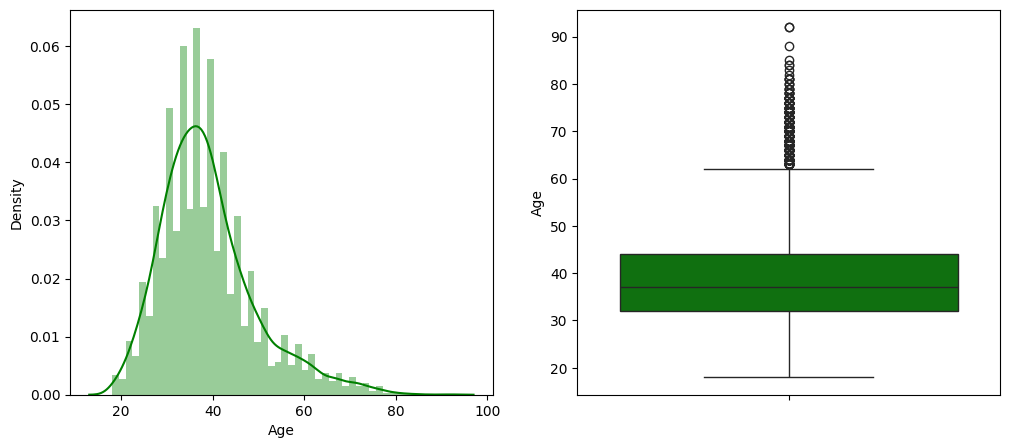

In [17]:
# LETS CHECK TH DISTRIBUTION OF AGE
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.distplot(df['Age'], kde=True, ax=ax[0], color='green')
sns.boxplot(df['Age'], ax=ax[1], color='green')

In [18]:
skewness_age = df['Age'].skew()
kurtosis_age = df['Age'].kurtosis()

print(f'The skew is: {round(skewness_age, 2)}')
print(f'The kurtosis is: {round(kurtosis_age, 2)}')

The skew is: 1.01
The kurtosis is: 1.4


# **OBSERVATION**
1. **Skewness (1.01)**:

The positive skewness indicates that the distribution of ages is skewed to the right.
In this context, it suggests that there may be a tail on the right side of the distribution, meaning that there are relatively more older individuals compared to younger ones.

2. **Kurtosis (1.4)**:

The positive kurtosis value suggests that the distribution of ages is slightly more peaked than a normal distribution (which has a kurtosis of 3).
This means that the distribution has heavier tails and more extreme values than a normal distribution, but it is not excessively peaked.

In [19]:
df[df['Age'] > 85]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
2458,15813303,Rearick,513,Spain,Male,88,10,0.00,2,1,1,52952.24,0,0,1,PLATINUM,627
6443,15764927,Rogova,753,France,Male,92,3,121513.31,1,0,1,195563.99,0,0,3,PLATINUM,307
6759,15660878,T'ien,705,France,Male,92,1,126076.24,2,1,1,34436.83,0,0,5,SILVER,772


<Axes: ylabel='Tenure'>

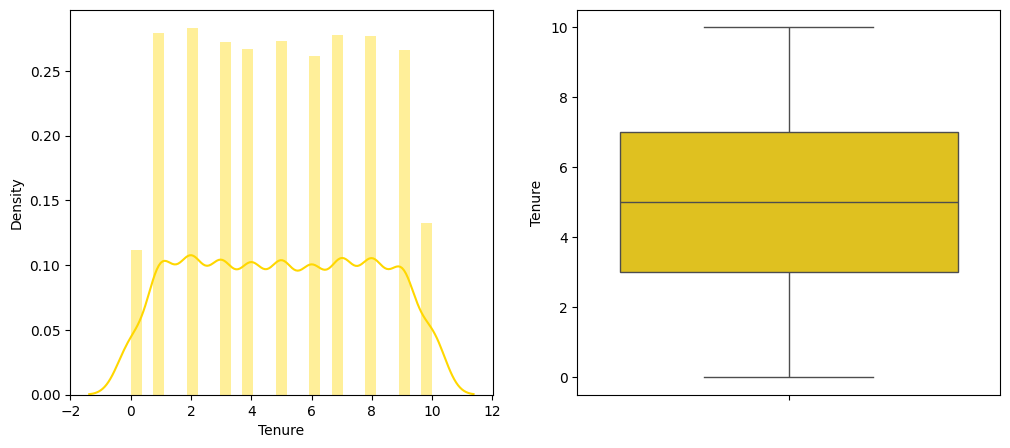

In [20]:
# LETS CHECK TH DISTRIBUTION OF TENURE
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.distplot(df['Tenure'], kde=True, ax=ax[0], color='gold')
sns.boxplot(df['Tenure'], ax=ax[1], color='gold')

# **OBSERVATION**
1. The bottom line of the box (the lower quartile) is at about 3 years, indicating that 25% of customers have a tenure of 3 years or less.
2. The median (the line in the middle of the box) is at about 5 years, which is the midpoint of the data and suggests that half of the customers have a tenure of 5 years or less.
3. The top line of the box (the upper quartile) is at about 7 years, showing that 75% of customers have a tenure of 7 years or less.
4. The "whiskers" of the boxplot (the lines extending from the top and bottom of the box) suggest that the bulk of the data falls within a tenure of 0 to 10 years.

<Axes: ylabel='Balance'>

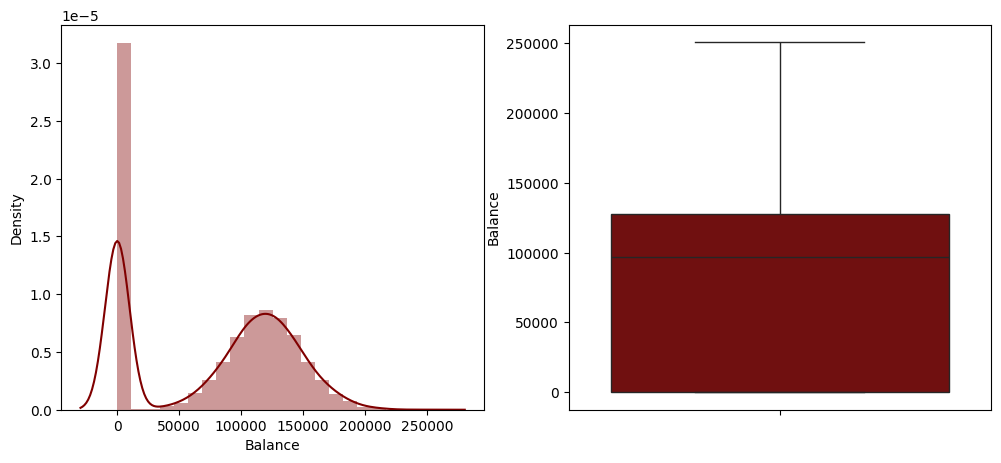

In [21]:
# LETS CHECK TH DISTRIBUTION OF TENURE
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.distplot(df['Balance'], kde=True, ax=ax[0], color='maroon')
sns.boxplot(df['Balance'], ax=ax[1], color='maroon')

# OBSERVATION
1. The peak suggests a large concentration of customers with a low or zero bank balance. After this initial peak, the distribution tapers off with customers spread across a range of balances up to 250,000, but with much lower density compared to the peak at zero.
2. The boxplot indicates that the median balance is around the middle of the box, which seems to be above 100,000, given the scale. The interquartile range is quite large, suggesting significant variance in customer balances.

<Axes: ylabel='NumOfProducts'>

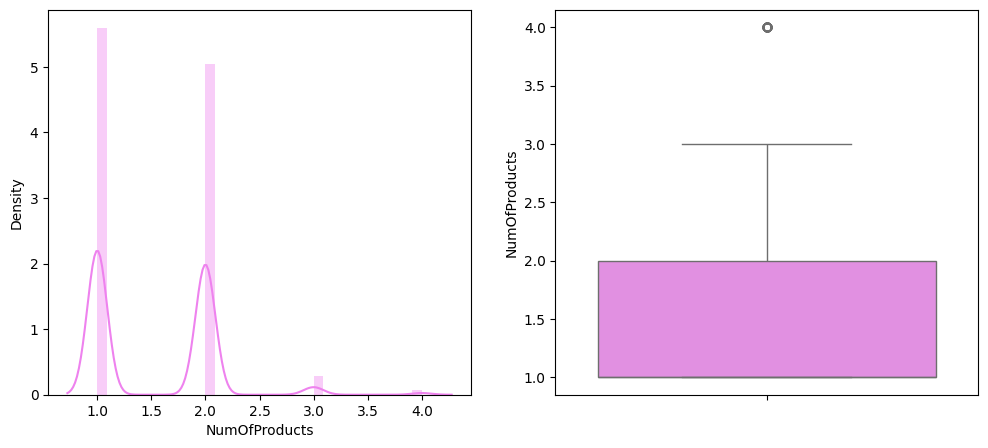

In [22]:
# LETS CHECK TH DISTRIBUTION OF NUMBER OF PRODUCTS
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.distplot(df['NumOfProducts'], kde=True, ax=ax[0], color='violet')
sns.boxplot(df['NumOfProducts'], ax=ax[1], color='violet')

# OBSERVATION
1. The histogram shows two prominent peaks, one at 1 and another at 2, indicating that most customers have either one or two bank products. There's a very small peak at 3, suggesting a few customers have three products, and there are negligible counts for 4 products.
2. The median number of products is at 2. This suggests that half of the customers have two or fewer products, and the other half have more than two.
3. The box itself (representing the interquartile range, or IQR) suggests that the middle 50% of customers have between 1 and 2 products.
4. The whiskers extend from 1 to 3, showing the range for the majority of the data.
5. There's an outlier indicated as a dot above the upper whisker, which shows at least one customer having 4 products, which is outside the typical range in the dataset.

In [23]:
df[df['NumOfProducts'] == 4]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
70,15703793,Konovalova,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1,1,4,GOLD,725
1254,15610383,Dumetolisa,628,France,Female,46,1,46870.43,4,1,0,31272.14,1,1,1,DIAMOND,826
1469,15670374,Wright,819,Germany,Female,49,1,120656.86,4,0,0,166164.30,1,1,3,PLATINUM,991
1488,15625824,Kornilova,596,Spain,Male,30,6,121345.88,4,1,0,41921.75,1,1,2,SILVER,317
1701,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1,1,4,DIAMOND,369
1876,15664754,Steele,640,Germany,Male,39,9,131607.28,4,0,1,6981.43,1,1,2,GOLD,436
2124,15603851,Galkin,704,France,Male,32,7,127785.17,4,0,0,184464.70,1,1,1,PLATINUM,981
2196,15791700,Ugochukwutubelum,773,Germany,Male,47,2,118079.47,4,1,1,143007.49,1,1,4,PLATINUM,668
2285,15783615,Ramos,630,Germany,Male,50,3,129370.91,4,1,1,47775.34,1,1,1,GOLD,712


<Axes: ylabel='EstimatedSalary'>

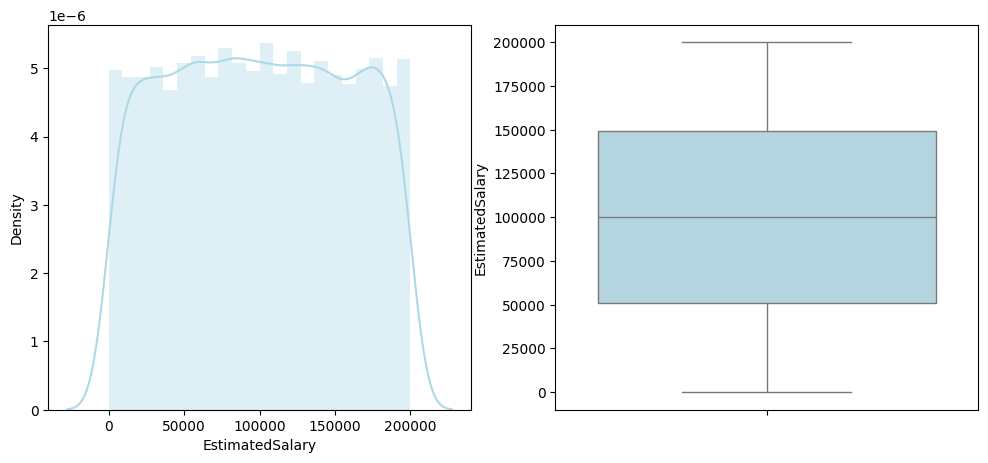

In [24]:
# LETS CHECK TH DISTRIBUTION OF NUMBER OF PRODUCTS
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.distplot(df['EstimatedSalary'], kde=True, ax=ax[0], color='lightblue')
sns.boxplot(df['EstimatedSalary'], ax=ax[1], color='lightblue')

# OBSERVATION
1. The distplot indicates a fairly uniform distribution across the range, with perhaps a slight increase in density towards the lower end of the salary range. There don't appear to be any significant spikes, which suggests that the estimated salary is relatively evenly distributed among the dataset's observations, without any strong clustering at specific salary levels.
2. The Boxplot interquartile range (IQR), represented by the box, seems to encompass a broad range of salaries, indicating a substantial spread between the 25th percentile and the 75th percentile.

<Axes: ylabel='Point Earned'>

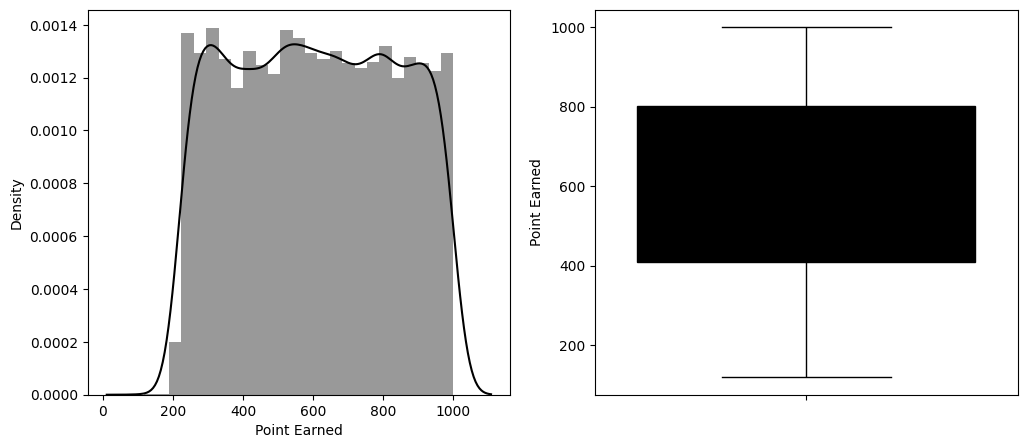

In [25]:
# LETS CHECK TH DISTRIBUTION OF POINT EARNED
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.distplot(df['Point Earned'], kde=True, ax=ax[0], color='black')
sns.boxplot(df['Point Earned'], ax=ax[1], color='black')

In [26]:
skewness_points = df['Point Earned'].skew()
kurtosis_points = df['Point Earned'].kurtosis()

print(f'The skew is: {round(skewness_points, 2)}')
print(f'The kurtosis is: {round(kurtosis_points, 2)}')

The skew is: 0.01
The kurtosis is: -1.19


# **CATEGORICAL FEATURES**

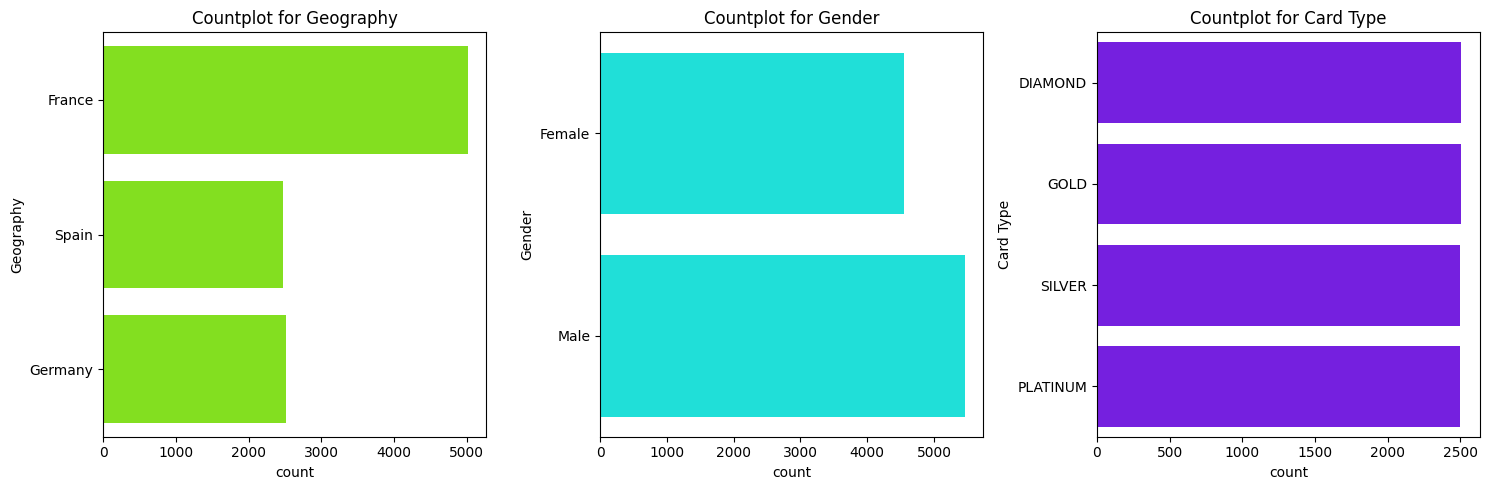

In [27]:
categorical_features = ['Geography', 'Gender', 'Card Type']
colors = sns.color_palette('hsv', len(categorical_features))

fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax = ax.flatten()

for index, feature in enumerate(categorical_features):
  sns.countplot(df[feature], ax=ax[index], color=colors[index])
  ax[index].set_title(f'Countplot for {feature}')

plt.tight_layout()
plt.show()

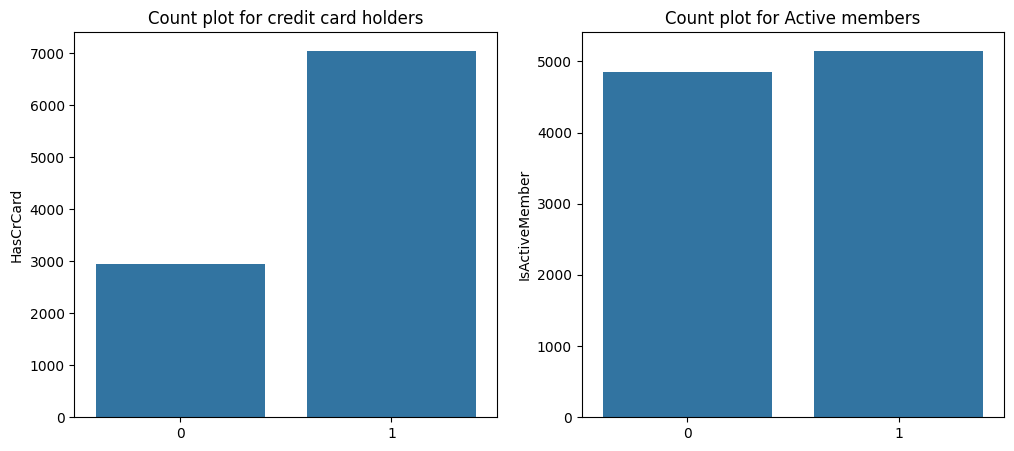

In [28]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.barplot(df['HasCrCard'].value_counts(), ci=None, ax=ax[0])
sns.barplot(df['IsActiveMember'].value_counts(), ci=None, ax=ax[1])
ax[0].set_title('Count plot for credit card holders')
ax[1].set_title('Count plot for Active members')

plt.show()

# **OBSERVATION**
1. **Countplot for Geography**:
It shows the distribution of customers across three geographical regions: France, Spain, and Germany. France has the highest number of customers, followed by Spain and Germany, with France having slightly less than twice the count of customers as Germany.

2. **Countplot for Gender**:
It depicts the gender distribution of customers. It shows that there are more male customers than female customers in the dataset, but the difference does not appear to be substantial.

3. **Countplot for Card Type:**
It indicates the number of different types of cards held by customers. Four types of cards are shown: Platinum, Gold, Silver, and Diamond. Silver cards are the most common, followed by Gold, Platinum, and Diamond. Diamond cards are the least common, with less than half the count of the Silver cards.

4. **Count plot for credit card holders:**
The first bar chart indicates that a larger number of individuals do have a credit card compared to those who do not have a credit card.

5. **Count plot for Active members:**
The number of active members is higher than inactive members, although the difference is not as pronounced as in the credit card holders' chart.

# MULTI VARIATE ANALYSIS WITH TARGET VARIABLE

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   HasCrCard           10000 non-null  int64  
 10  IsActiveMember      10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  int64  
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Point

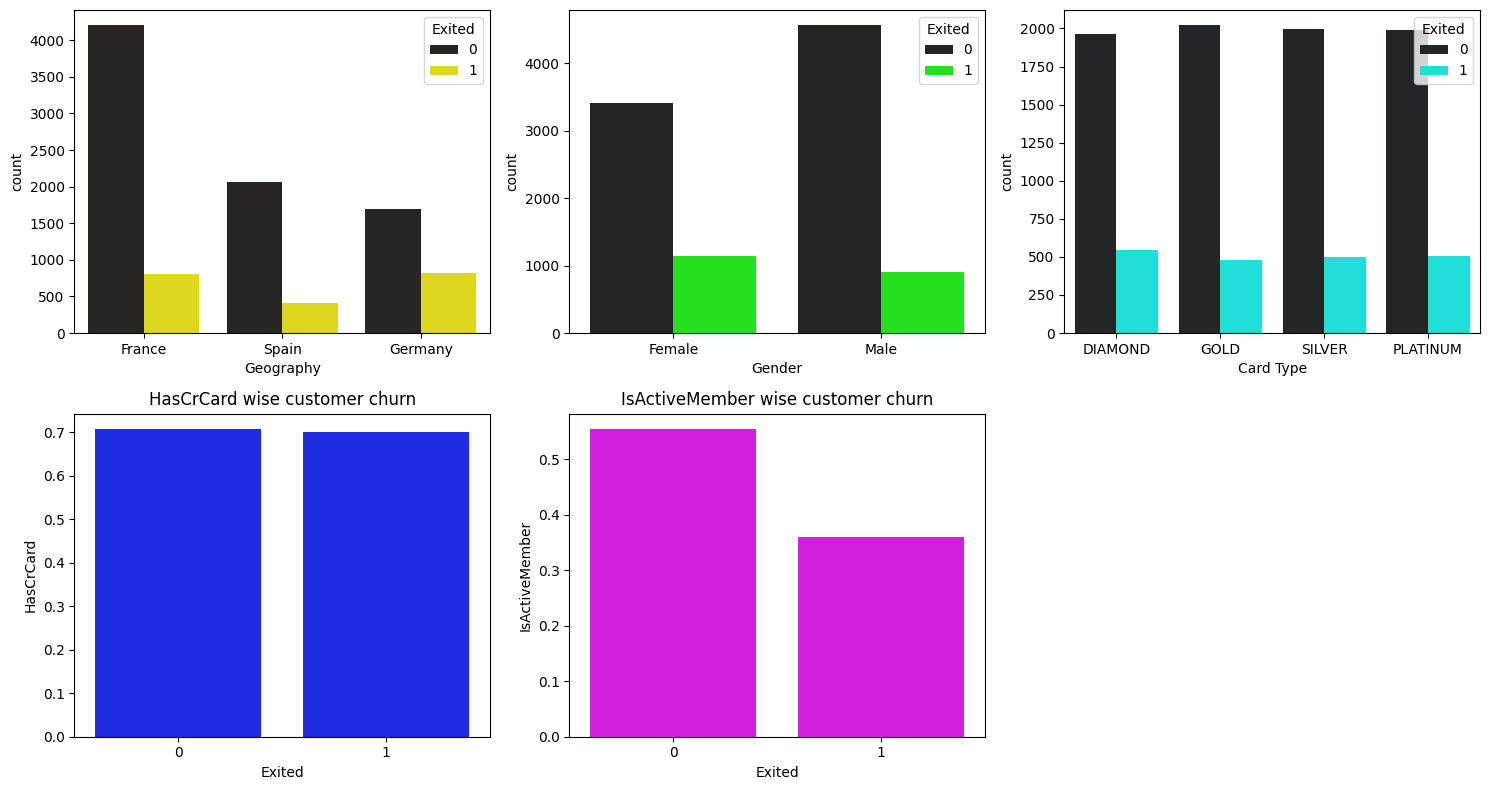

In [30]:
# CATEGORICAL FEATURES

features = ['Geography', 'Gender', 'Card Type', 'HasCrCard', 'IsActiveMember']
colors = sns.color_palette('hsv', len(features))
target = 'Exited'

fig, ax = plt.subplots(2, 3, figsize=(15,8))
ax = ax.flatten()

for index, feature in enumerate(features):
    if feature in df.select_dtypes(include='object').columns:
        sns.countplot(x=feature, hue=target, data=df, ax=ax[index], color=colors[index])
    else:
        sns.barplot(x=target, y=feature, data=df, ax=ax[index], color=colors[index], ci=None)
        ax[index].set_title(f'{feature} wise customer churn')

for i in range(len(features), 2*3):
        ax[i].set_visible(False)

plt.tight_layout()
plt.show()

# **OBSERVATION**
1. **Geography**:
   - In France, the number of customers who stayed with the bank is significantly higher than those who exited.
   - In Spain, more customers stayed than left, but the difference is not as pronounced as in France.
   - In Germany, the number of customers who left is comparatively higher than in France or Spain, but still lower than those who stayed.

2. **Gender**:
   - For both genders, more customers stayed with the bank than exited.
   - The difference in count between the customers who stayed and those who exited is larger for males than for females.

3. **Card Type**:
   - For all card types (DIAMOND, GOLD, SILVER, and PLATINUM), the number of customers who stayed is higher than those who exited.
   - The difference between stayers and leavers is relatively similar across all card types, although slightly higher for SILVER card holders.

4. **HasCrCard wise customer churn**:
   - The chart suggests that the presence of a credit card (or the lack thereof) does not have a significant difference in terms of customer churn, as the proportions are quite similar for both groups.

5. **IsActiveMember wise customer churn**:
   - Among the customers who stayed, a substantial proportion were active members.
   - Among the customers who exited, a smaller proportion were active members, suggesting that active membership is a factor in retaining customers.

The overall summary suggests that geographic location, gender, card type, credit card ownership, and active membership status are factors associated with customers' decisions to stay with or leave the bank, with active membership being a notable factor in retention.

In [31]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned'],
      dtype='object')

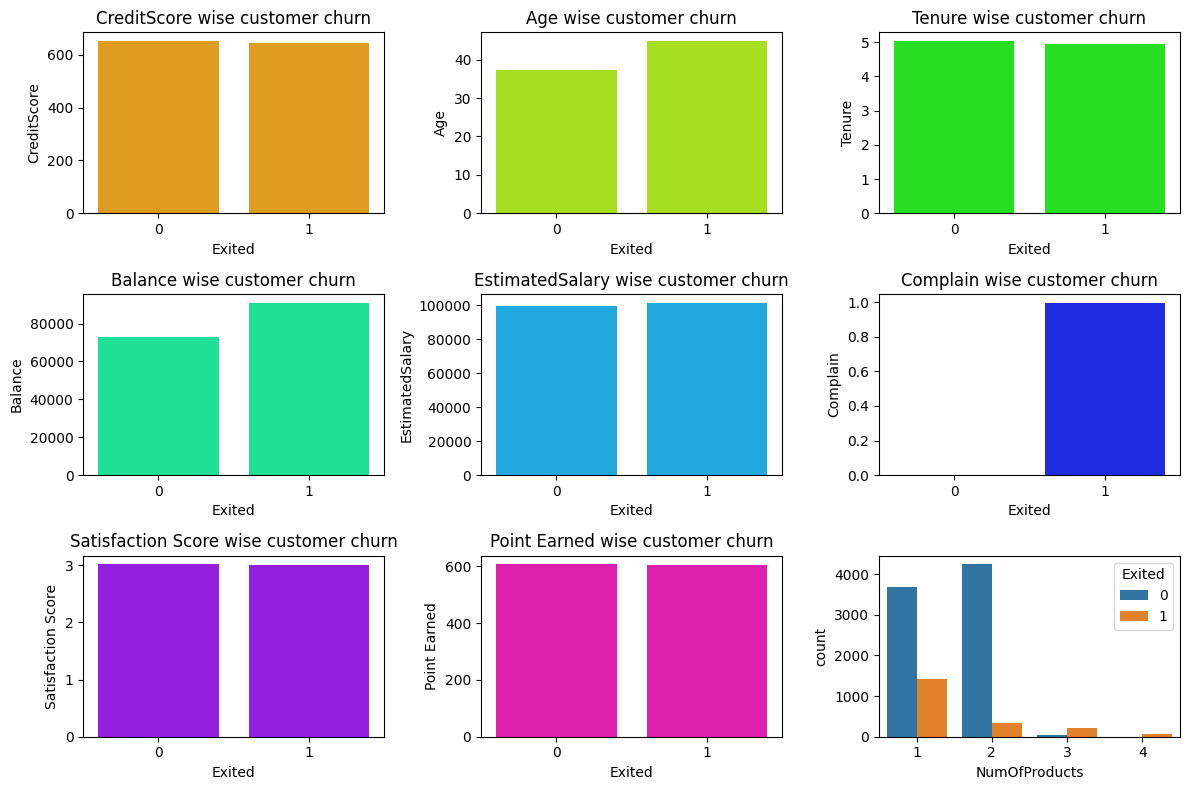

In [32]:
# NUMERICAL FEATURES

features_num = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned']
colors = sns.color_palette('hsv', len(features_num))
target = 'Exited'

fig, ax = plt.subplots(3, 3, figsize=(12,8))
ax = ax.flatten()

for index, feature in enumerate(features_num):
      sns.barplot(x=df[target], y=df[feature], ax=ax[index], color=colors[index], ci=None)
      ax[index].set_title(f'{feature} wise customer churn')

sns.countplot(data=df, x='NumOfProducts', hue='Exited', ax=ax[8])


plt.tight_layout()
plt.show()

# **OBSERVATION**
1. **CreditScore wise customer churn**:
   - Both groups have high credit scores on average, but customers who exited have a slightly lower average credit score than those who stayed.

2. **Age wise customer churn**:
   - The average age of customers who exited is higher compared to those who stayed.

3. **Tenure wise customer churn**:
   - The average tenure appears similar for both groups, suggesting tenure might not be a strong predictor of churn in this data set.

4. **Balance wise customer churn**:
   - Customers who exited have a significantly higher average balance compared to those who stayed with the bank.

5. **NumOfProducts wise customer churn**:
   - The number of products (1, 2, 3, 4) is an ordinal variable; there is a natural order to this category, as the number of products increases incrementally. It's clear that as the number of products increases, the number of customers who have exited also increases, especially noticeable with 3 and 4 products.

6. **EstimatedSalary wise customer churn**:
   - The average estimated salary seems to be roughly similar for both groups, indicating salary might not be a decisive factor in the decision to leave the bank.

7. **Complain wise customer churn**:
   - There is a visible difference between the groups, with those who exited having a higher proportion of complaints.

8. **Satisfaction Score wise customer churn**:
   - Customers who exited have a lower average satisfaction score, which could be a factor in their decision to leave the bank.

9. **Point Earned wise customer churn**:
   - The average points earned are slightly lower for customers who exited compared to those who stayed.

From this summary, we can infer that age, balance, the number of products, complaint status, satisfaction score, and possibly credit score may be related to customer churn. Salary and tenure seem to have less of an impact on a customer's decision to leave the bank.

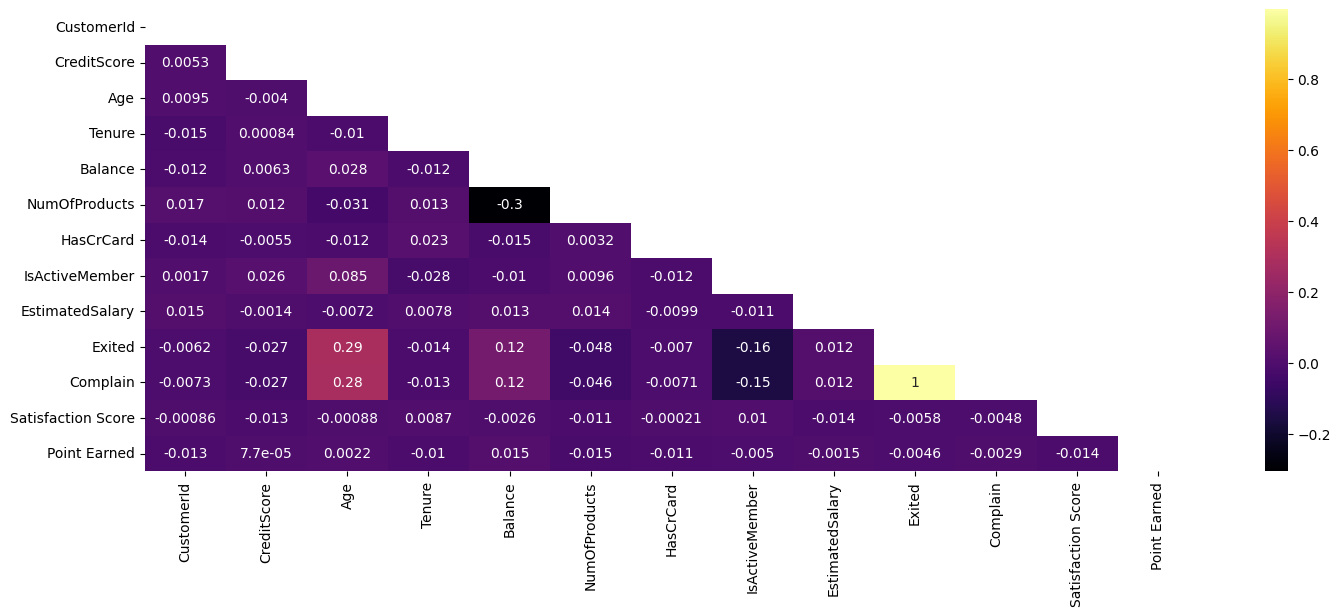

In [33]:
plt.figure(figsize = (17,6))
sns.heatmap(df.corr(), cmap='inferno', annot=True, mask=np.triu(np.ones_like(df.corr(), dtype=bool)))
plt.show()

# **OBSERVATION**
1. The 'Exited' column has a relatively higher positive correlation with 'Age' (0.29) and 'Balance' (0.12), suggesting older customers and those with higher balances are more likely to have exited.

2. 'NumOfProducts' has a moderate negative correlation with 'Balance' (-0.3), which might indicate that customers with more products tend to have lower balances, or vice versa.

3. 'Complain' has a correlation coefficient of 1 with 'Exited'. This is likely indicating a perfect linear relationship where a complaint results in exiting or all those who exited had lodged a complaint. In our predictive model, using a feature with a perfect correlation to the target would lead to overfitting, where the model learns to replicate the data it was trained on but fails to generalize to unseen data.

4. Most other features show very low correlation coefficients with 'Exited' and among themselves, indicating no strong linear relationships.

5. 'CreditScore', 'Tenure', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Satisfaction Score', and 'Point Earned' show very weak correlations with 'Exited', meaning they might not be strong individual predictors for customer churn in this dataset.

In [34]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [35]:
df.drop(columns=['CustomerId', 'Surname', 'Complain'], inplace = True)

In [36]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


# **FEATURE SELECTION AND DATA PREPROCESSING**

In [37]:
df['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

In [38]:
X = df.drop(columns='Exited')
y = df['Exited']

In [39]:
# THE DATA IS IMBALANCED. LETS USE TO SMOTEN TO INCREASE THE MINORITY CLASS
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTEN

# Splitting before using smoten to maintain the imbalanced data for later prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling the imbalance
smote = SMOTEN(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

ohe = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

In [41]:
encode_ohe = ['Geography', 'Gender', 'Card Type']
scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

transform = ColumnTransformer(transformers=[
    ('ohe', ohe, encode_ohe),
    ('scale', scaler, scale)
], remainder='passthrough')

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

transform = ColumnTransformer(transformers=[
    ('ohe', ohe, encode_ohe),
    ('scale', scaler, scale)
], remainder='passthrough')

transform.set_output(transform='pandas')
transformed_x = transform.fit_transform(X_resampled)

transformed_x.head()


,ohe__Geography_France,ohe__Geography_Germany,ohe__Geography_Spain,ohe__Gender_Female,ohe__Gender_Male,ohe__Card Type_DIAMOND,ohe__Card Type_GOLD,ohe__Card Type_PLATINUM,ohe__Card Type_SILVER,scale__CreditScore,scale__Age,scale__Tenure,scale__Balance,scale__EstimatedSalary,scale__Satisfaction Score,scale__Point Earned,remainder__NumOfProducts,remainder__HasCrCard,remainder__IsActiveMember
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.080957,0.177502,-0.882267,-1.286046,0.465656,-0.594723,-0.187239,1,1,1
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.026070,0.076813,-1.221792,0.217235,0.655523,0.120022,-0.221576,1,0,1
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.057426,0.177502,1.154885,1.577827,0.679083,0.120022,-0.560652,3,1,0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.859339,-0.124565,-1.221792,-1.286046,0.338064,1.549511,-0.676539,2,0,0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.328534,0.278191,-0.882267,0.965271,0.088001,1.549511,-0.354631,1,1,1


In [86]:
# applying transformations on imbalanced original X_test
transform.set_output(transform='pandas')
transformed_xtest = transform.fit_transform(X_test)

transformed_xtest.head()

,ohe__Geography_France,ohe__Geography_Germany,ohe__Geography_Spain,ohe__Gender_Female,ohe__Gender_Male,ohe__Card Type_DIAMOND,ohe__Card Type_GOLD,ohe__Card Type_PLATINUM,ohe__Card Type_SILVER,scale__CreditScore,scale__Age,scale__Tenure,scale__Balance,scale__EstimatedSalary,scale__Satisfaction Score,scale__Point Earned,remainder__NumOfProducts,remainder__HasCrCard,remainder__IsActiveMember
6252,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.512502,-0.677299,-0.698445,0.300846,-0.990969,-1.433550,0.450419,2,0,0
4684,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.236047,0.384298,-1.380355,-1.255997,0.829379,-0.725624,-0.424371,2,1,1
1731,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.461306,0.480807,-0.357491,-1.255997,-0.699045,-1.433550,-1.412317,2,1,0
4742,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.434019,1.928440,1.006327,0.662139,1.252315,-0.725624,1.625509,2,1,1
4521,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.881109,-1.159844,0.665373,0.756215,0.277492,1.398153,-0.646332,1,1,1


In [43]:
# FEATURE IMPORTANCES

'''RFE'''
estimator = DecisionTreeClassifier()

rfe = RFE(estimator, n_features_to_select=transformed_x.shape[1], step=1)
label = rfe.fit(transformed_x, y_resampled)

selected_features = transformed_x.columns[label.support_]
selected_coeff = label.estimator_.feature_importances_

rfe_df = pd.DataFrame({
    "features":transformed_x.columns,
    "rfe_importance":selected_coeff
}).sort_values("rfe_importance", ascending=False)

rfe_df

,features,rfe_importance
15,scale__Point Earned,0.245305
13,scale__EstimatedSalary,0.190599
10,scale__Age,0.125892
9,scale__CreditScore,0.107865
16,remainder__NumOfProducts,0.090586
12,scale__Balance,0.084930
18,remainder__IsActiveMember,0.034744
11,scale__Tenure,0.029423
14,scale__Satisfaction Score,0.021662
1,ohe__Geography_Germany,0.016810


In [44]:
'''RandomForest'''
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(transformed_x, y_resampled)

rf_df = pd.DataFrame({
    "features":transformed_x.columns,
    "rf_importance":rf.feature_importances_
}).sort_values('rf_importance', ascending=False)

rf_df

,features,rf_importance
13,scale__EstimatedSalary,0.179973
15,scale__Point Earned,0.168983
9,scale__CreditScore,0.147502
10,scale__Age,0.136364
12,scale__Balance,0.096106
16,remainder__NumOfProducts,0.077174
11,scale__Tenure,0.039868
14,scale__Satisfaction Score,0.028926
18,remainder__IsActiveMember,0.025914
1,ohe__Geography_Germany,0.016551


In [45]:
'''Permutation Importance'''
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(transformed_x, y_resampled, test_size=0.2, random_state=42)

xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(Xtrain, ytrain)

# Calculating permutation importance
permutation_imp = permutation_importance(xgb, Xtest, ytest, n_repeats=50, random_state=42, n_jobs=-1)

pi_df = pd.DataFrame({
    "features":transformed_x.columns,
    "pi_importance":permutation_imp.importances_mean
}).sort_values("pi_importance", ascending=False)

pi_df

,features,pi_importance
16,remainder__NumOfProducts,0.075466
10,scale__Age,0.065400
13,scale__EstimatedSalary,0.043284
15,scale__Point Earned,0.037545
12,scale__Balance,0.036823
9,scale__CreditScore,0.031887
18,remainder__IsActiveMember,0.019673
1,ohe__Geography_Germany,0.010455
3,ohe__Gender_Female,0.002499
7,ohe__Card Type_PLATINUM,0.001256


In [46]:
'''LASSO'''
lasso = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)
lasso.fit(Xtrain, ytrain)

lasso_df = pd.DataFrame({
    'features': Xtrain.columns,
    'lasso_coeff': abs(lasso.coef_.flatten())
}).sort_values(by='lasso_coeff', ascending=False)


lasso_df

,features,lasso_coeff
18,remainder__IsActiveMember,0.979629
1,ohe__Geography_Germany,0.938388
13,scale__EstimatedSalary,0.722668
15,scale__Point Earned,0.702558
10,scale__Age,0.690685
9,scale__CreditScore,0.657666
2,ohe__Geography_Spain,0.480477
3,ohe__Gender_Female,0.440531
5,ohe__Card Type_DIAMOND,0.337482
11,scale__Tenure,0.208425


In [47]:
'''Gradient Boost'''
gbr = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbr.fit(transformed_x, y_resampled)

gboost_df = pd.DataFrame({
    "features":transformed_x.columns,
    "gbr_importance":gbr.feature_importances_
}).sort_values("gbr_importance", ascending=False)

gboost_df

,features,gbr_importance
13,scale__EstimatedSalary,0.235873
15,scale__Point Earned,0.193285
10,scale__Age,0.148180
9,scale__CreditScore,0.137796
16,remainder__NumOfProducts,0.130443
12,scale__Balance,0.073552
18,remainder__IsActiveMember,0.039540
1,ohe__Geography_Germany,0.020758
2,ohe__Geography_Spain,0.004549
4,ohe__Gender_Male,0.004481


In [48]:
final_df = rfe_df.merge(rf_df, on='features').merge(pi_df, on='features').merge(lasso_df, on='features').merge(gboost_df, on='features').set_index('features')

In [49]:
final_df['Mean_Importance'] = final_df.mean(axis=1)

In [50]:
final_df.sort_values(by='Mean_Importance', ascending=False)

,rfe_importance,rf_importance,pi_importance,lasso_coeff,gbr_importance,Mean_Importance
features,,,,,,
scale__EstimatedSalary,0.190599,0.179973,0.043284,0.722668,0.235873,0.274479
scale__Point Earned,0.245305,0.168983,0.037545,0.702558,0.193285,0.269535
scale__Age,0.125892,0.136364,0.065400,0.690685,0.148180,0.233304
remainder__IsActiveMember,0.034744,0.025914,0.019673,0.979629,0.039540,0.219900
scale__CreditScore,0.107865,0.147502,0.031887,0.657666,0.137796,0.216543
ohe__Geography_Germany,0.016810,0.016551,0.010455,0.938388,0.020758,0.200592
remainder__NumOfProducts,0.090586,0.077174,0.075466,0.187801,0.130443,0.112294
ohe__Geography_Spain,0.007398,0.014453,0.000973,0.480477,0.004549,0.101570
ohe__Gender_Female,0.006406,0.009472,0.002499,0.440531,0.003420,0.092466


In [51]:
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold


model_dict = {
    'logistic_reg':LogisticRegression(),
    'svr':SVC(),
    'decision tree': DecisionTreeClassifier(),
    'random forest':RandomForestClassifier(),
    'extra trees': ExtraTreeClassifier(),
    'gradient boosting': GradientBoostingClassifier(),
    'adaboost': AdaBoostClassifier(),
    'xgboost':XGBClassifier()
}

In [52]:
def model_scorer(model_name, model):
  output = []
  output.append(model_name)

  transform = ColumnTransformer(transformers=[
    ('ohe', ohe, encode_ohe),
    ('scale', scaler, scale)
  ], remainder='passthrough')

  pipeline = Pipeline([
      ('transformation', transform),
      ('model_name', model)
  ])

  kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
  score = cross_val_score(pipeline, X_resampled, y_resampled, cv=kfolds, scoring='f1').mean()
  output.append(score)

  X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
  pipeline.fit(X_train_resampled, y_train_resampled)
  prediction = pipeline.predict(X_test_resampled)

  output.append(round(recall_score(y_test_resampled, prediction), 2))
  output.append(round(precision_score(y_test_resampled, prediction), 2))
  output.append(round(roc_auc_score(y_test_resampled, prediction), 2))

  return output


In [53]:
model_scores = []
for name, model in model_dict.items():
  model_scores.append(model_scorer(name, model))

In [54]:
scores_dataframe = pd.DataFrame(model_scores, columns=['Model', 'F1', 'Recall', 'Precision', 'ROC_AUC'])

In [55]:
scores_dataframe

,Model,F1,Recall,Precision,ROC_AUC
0,logistic_reg,0.814667,0.82,0.80,0.82
1,svr,0.886603,0.86,0.90,0.89
2,decision tree,0.857360,0.87,0.83,0.85
3,random forest,0.900574,0.87,0.92,0.90
4,extra trees,0.834434,0.85,0.80,0.83
5,gradient boosting,0.888127,0.88,0.89,0.89
6,adaboost,0.864493,0.87,0.85,0.87
7,xgboost,0.900289,0.89,0.90,0.90


# **HYPER PARAMETER TUNING FOR XGBOOST**

In [84]:
from hyperopt import space_eval, fmin, Trials, hp, tpe, STATUS_OK

xgb_space = {
    'n_estimators': hp.choice('xgb_n_estimators', [100, 300, 500, 700]),
    'max_depth': hp.choice('xgb_max_depth', list(range(1, 11))),
    'learning_rate': hp.uniform('xgb_learning_rate', 0.01, 0.3),
    'subsample': hp.uniform('xgb_subsample', 0.5, 0.9),
    'colsample_bytree': hp.uniform('xgb_colsample_bytree', 0.5, 0.9),
    'min_child_weight': hp.choice('xgb_min_child_weight', [1, 5, 10]),
    'gamma': hp.uniform('xgb_gamma', 0, 1),
    'reg_alpha': hp.uniform('xgb_reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('xgb_reg_lambda', 0.001, 1)
}



def objective(params):
  xg = XGBClassifier(**params)
  score = cross_val_score(xg, transformed_x, y_resampled, cv=10, scoring='f1', n_jobs=-1).mean()

  return {'loss': -score, 'status': STATUS_OK}

trials = Trials()
best_xgb = fmin(space=xgb_space,
                fn=objective,
                algo=tpe.suggest,
                max_evals=75,
                trials=trials)


100%|██████████| 75/75 [09:38<00:00,  7.71s/trial, best loss: -0.8838907298603569]


In [85]:
best_params = space_eval(xgb_space, best_xgb)
print(best_params)

{'colsample_bytree': 0.5169871161491497, 'gamma': 0.31612358363699705, 'learning_rate': 0.05689203509005204, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 500, 'reg_alpha': 0.47431632645325084, 'reg_lambda': 0.10736768410644182, 'subsample': 0.7703629463120112}


In [89]:
params = {'subsample': 0.7, 'reg_lambda': 0.3, 'reg_alpha': 0.3, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.3, 'gamma': 0.9, 'colsample_bytree': 0.3}

In [93]:
xgb_final = XGBClassifier(**best_params)

# fitting on resampled data
xgb_final.fit(transformed_x, y_resampled)

# predicting on imbalanced X_test as the real world data wont be balanced
prediction = xgb_final.predict(transformed_xtest)

print(f'The recall score is: {round(recall_score(y_test, prediction), 2)}')
print(f'The precision score is: {round(precision_score(y_test, prediction), 2)}')
print(f'The ROC_AUC score is: {round(roc_auc_score(y_test, prediction), 2)}')
print(f'The F1 score is: {round(f1_score(y_test, prediction), 2)}')

The recall score is: 0.67
The precision score is: 0.47
The ROC_AUC score is: 0.74
The F1 score is: 0.55


In [96]:
# training on imbalanced original data
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned
9254,686,France,Male,32,6,0.00,2,1,1,179093.26,2,DIAMOND,510
1561,632,Germany,Male,42,4,119624.60,2,1,1,195978.86,4,PLATINUM,959
1670,559,Spain,Male,24,3,114739.92,1,1,0,85891.02,4,SILVER,327
6087,561,France,Female,27,9,135637.00,1,1,0,153080.40,2,SILVER,567
6669,517,France,Male,56,9,142147.32,1,0,0,39488.04,3,PLATINUM,727
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,France,Male,54,8,69712.74,1,1,1,69381.05,3,SILVER,569
5191,682,France,Female,58,1,0.00,1,1,1,706.50,4,PLATINUM,709
5390,735,France,Female,38,1,0.00,3,0,0,92220.12,5,SILVER,678
860,667,France,Male,43,8,190227.46,1,1,0,97508.04,3,DIAMOND,680


In [97]:
encode_ohe = ['Geography', 'Gender', 'Card Type']
scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

transform1 = ColumnTransformer(transformers=[
    ('ohe', ohe, encode_ohe),
    ('scale', scaler, scale)
], remainder='passthrough')

In [99]:
transform1.set_output(transform='pandas')
transformed_train_imbalanced = transform1.fit_transform(X_train)
transformed_test_imbalanced = transform1.fit_transform(X_test)

In [100]:
xgb_final_im = XGBClassifier(n_estimators=500,
    max_depth=5,
    learning_rate=0.05689203509005204,
    subsample=0.7703629463120112,
    colsample_bytree=0.5169871161491497,
    min_child_weight=1,
    gamma=0.31612358363699705,
    reg_alpha=0.47431632645325084,
    reg_lambda=0.10736768410644182,
    scale_pos_weight=7962 / 2038)

# fitting on resampled data
xgb_final_im.fit(transformed_train_imbalanced, y_train)

# predicting on imbalanced X_test as the real world data wont be balanced
prediction1 = xgb_final_im.predict(transformed_test_imbalanced)

print(f'The recall score is: {round(recall_score(y_test, prediction1), 2)}')
print(f'The precision score is: {round(precision_score(y_test, prediction1), 2)}')
print(f'The ROC_AUC score is: {round(roc_auc_score(y_test, prediction1), 2)}')
print(f'The F1 score is: {round(f1_score(y_test, prediction1), 2)}')

The recall score is: 0.68
The precision score is: 0.58
The ROC_AUC score is: 0.78
The F1 score is: 0.63


In [102]:
# Assume xgb_model_balanced is your model trained on balanced data.
predictions_weighted = xgb_final_im.predict_proba(transformed_test_imbalanced)[:, 1]
predictions_balanced = xgb_final.predict_proba(transformed_xtest)[:, 1]

array([0.04498792, 0.0257909 , 0.3627538 , ..., 0.91038424, 0.15400308,
       0.42824706], dtype=float32)

In [126]:
# Blend predictions with weights 70% A and 30% B
blended_predictions_70_30 = 0.7 * predictions_weighted + 0.3 * predictions_balanced

# Blend predictions with weights 80% A and 20% B
blended_predictions_80_20 = 0.8 * predictions_weighted + 0.2 * predictions_balanced

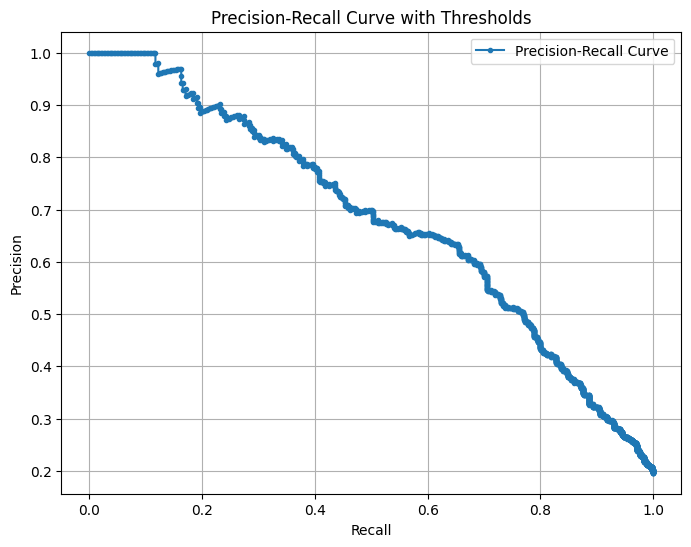

In [132]:
from sklearn.metrics import precision_recall_curve

precision_70_30, recall_70_30, thresholds_70_30 = precision_recall_curve(y_test, blended_predictions_70_30)

precision_70_30_class = precision_70_30[:len(thresholds_70_30)]
recall_70_30_class = recall_70_30[:len(thresholds_70_30)]

precision_class70_30 = np.append(precision_70_30_class, 1)
recall_class70_30 = np.append(recall_70_30_class, 0)
# thresholds_70_30 = thresholds_70_30[:-1]  # Remove the last element to match dimensions

plt.figure(figsize=(8, 6))

# Plot precision-recall curve
plt.plot(recall_class70_30, precision_class70_30, marker='.', label='Precision-Recall Curve')

plt.title('Precision-Recall Curve with Thresholds')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

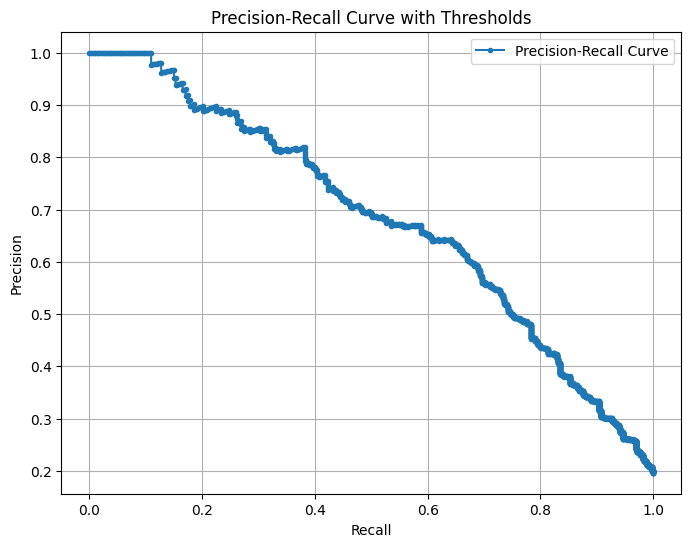

In [131]:
precision_80_20, recall_80_20, thresholds_80_20 = precision_recall_curve(y_test, blended_predictions_80_20)

precision_80_20 = precision_80_20[:len(thresholds_70_30)]
recall_80_20 = recall_80_20[:len(thresholds_70_30)]

precision_80_20_class = np.append(precision_80_20, 1)
recall_80_20_class = np.append(recall_80_20, 0)
# thresholds_70_30 = thresholds_70_30[:-1]  # Remove the last element to match dimensions

plt.figure(figsize=(8, 6))

# Plot precision-recall curve
plt.plot(recall_80_20_class, precision_80_20_class, marker='.', label='Precision-Recall Curve')


plt.title('Precision-Recall Curve with Thresholds')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

In [140]:
idx_optimal_70_30 = np.argmax(recall_70_30 >= 0.72)  # Assuming we want at least 0.80 recall

# Find index of the highest recall with acceptable precision for 80_20 blend
idx_optimal_80_20 = np.argmax(recall_80_20 >= 0.72)

In [145]:
f1_70_30 = f1_score(y_test, blended_predictions_70_30 >= optimal_threshold_70_30)
f1_80_20 = f1_score(y_true, blended_predictions_80_20 >= optimal_threshold_80_20)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [146]:
f1_70_30

0.32845800250731305

In [147]:
f1_80_20

0.32845800250731305